# 1. 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
data = pd.read_csv('/content/final_data_revised.csv')
data.head()

,ABBV,ABT,ADM,ADP,AFL,ALB,AOS,APD,ATO,BDX,...,SHW,SJM,SPGI,SWK,SYY,TGT,TROW,WMT,WST,XOM
0,1.18,0.36,0.00,0.00,0.00,0.000,0.24,0.00,0.000,0.000000,...,0.000000,0.00,0.00,0.00,0.45,0.00,0.0,0.00,0.16,0.00
1,0.00,0.00,0.36,0.00,0.28,0.000,0.00,0.00,0.575,0.000000,...,0.446667,0.88,0.67,0.00,0.00,0.66,0.0,0.00,0.00,0.87
2,0.00,0.00,0.00,0.91,0.00,0.385,0.00,1.34,0.000,0.770732,...,0.000000,0.00,0.00,0.69,0.00,0.00,0.9,0.18,0.00,0.00
3,1.18,0.36,0.00,0.00,0.00,0.000,0.24,0.00,0.000,0.000000,...,0.000000,0.00,0.00,0.00,0.45,0.00,0.0,0.00,0.16,0.00
4,0.00,0.00,0.36,0.00,0.28,0.000,0.00,0.00,0.575,0.000000,...,0.446667,0.88,0.67,0.00,0.00,0.66,0.0,0.18,0.00,0.87


In [ ]:
data = pd.DataFrame(np.random.rand(51, 65))
data.shape

(51, 65)

In [ ]:
dividends = data.values

# n 종목의 개수  n= 64
X = np.ones((64, 1))

# 구매개수 X 와 해당 dividends 의 곱으로 이루어진 포트폴리오
portfolio = X * dividends

[[5 1 4 ... 1 4 5]
 [2 3 5 ... 4 3 4]
 [1 5 1 ... 5 3 4]
 ...
 [1 1 4 ... 3 5 2]
 [4 5 2 ... 1 2 2]
 [1 2 1 ... 2 3 5]]
[[2.87307722 0.6488339  2.33891416 ... 0.3801753  0.22514222 1.07368073]
 [1.71859652 0.36560086 2.78696134 ... 3.75828275 1.44366609 2.58951619]
 [0.9066822  2.0785824  0.83321013 ... 3.76950417 1.20075573 1.04266327]
 ...
 [0.04467188 0.78883899 0.99486898 ... 1.35629949 3.67292646 1.72329175]
 [2.86835694 0.49505393 0.7732925  ... 0.28937689 0.65385846 0.013822  ]
 [0.45187008 1.78292288 0.13825472 ... 0.92492157 0.49374663 3.56856279]]


# 2. 유전 알고리즘

In [43]:
# 샤프 지수 계산 함수 정의
# 배당금 수익률 계산
dividend_yield = monthly_dividends / monthly_prices
dividend_yield = dividend_yield.fillna(0)  # 배당금이 없는 경우 0으로 대체

# 주식 가격 수익률 계산
price_return = monthly_prices.pct_change().fillna(0)

# 총수익률 계산
total_return = price_return + dividend_yield

# 기업별 평균 수익률 계산
average_return = total_return.mean()

# 포트폴리오 기대수익률 계산
weights = np.ones(65) / 65  # 단순히 동일 가중치 예제
R_p = np.dot(weights, average_return)

# 수익률의 공분산 행렬 계산
cov_matrix = total_return.cov()

# 포트폴리오 변동성 계산
sigma_p = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# 무위험 수익률 설정
R_f = 0.01

# 샤프 지수 계산
sharpe_ratio = (R_p - R_f) / sigma_p

print("포트폴리오 기대수익률 (R_p):", R_p)
print("포트폴리오 변동성 (sigma_p):", sigma_p)
print("샤프 지수:", sharpe_ratio)

NameError: name 'monthly_dividends' is not defined

In [ ]:
import numpy as np
import random


# 초기 유전 알고리즘 파라미터 설정
population_size = 50
num_generations = 100
mutation_rate = 0.1
budget = 1 #가정


# population 배열 생성
population = np.zeros((population_size, 124, 64))

for i in range(population_size):
    # 전체 합이 예산만큼 크기를 가지도록 매트릭스 생성
    initial_sol = np.random.rand(124, 64)
    total_sum = np.sum(initial_sol)
    initial_sol = initial_sol * budget / total_sum
    population[i] = initial_sol


Population 1 :
 [[1.18465767e-04 5.18335710e-05 2.16242496e-04 ... 2.94310396e-05
  1.75763271e-04 9.08560961e-05]
 [2.65737125e-05 1.08655825e-04 4.64267778e-05 ... 1.49861962e-04
  1.23582683e-05 1.24558438e-04]
 [1.25505154e-04 2.95001612e-05 1.50160898e-05 ... 2.11442232e-05
  1.86827755e-04 4.24876534e-05]
 ...
 [1.70231948e-04 1.16116514e-04 1.43368312e-05 ... 1.86823649e-04
  2.18078377e-04 8.84688224e-06]
 [3.99552291e-05 1.13258916e-04 2.32235286e-04 ... 6.54799054e-05
  1.75732055e-05 3.56830961e-05]
 [6.38432371e-05 2.25085706e-04 1.98868514e-04 ... 5.95874380e-05
  7.90439052e-05 2.50693499e-05]]
Total Sum: 0.9999999999999999
Population 2 :
 [[2.27401809e-04 9.93776189e-05 1.93305275e-04 ... 1.50095386e-04
  8.40915454e-05 5.79440169e-05]
 [4.82042326e-05 1.20439514e-04 1.38874273e-05 ... 1.26745983e-04
  1.00001263e-04 2.19090787e-04]
 [1.27601302e-04 1.40404343e-04 1.19447667e-04 ... 4.40490240e-05
  1.35607796e-04 3.50045340e-05]
 ...
 [5.71737974e-05 6.29367279e-05 1.39

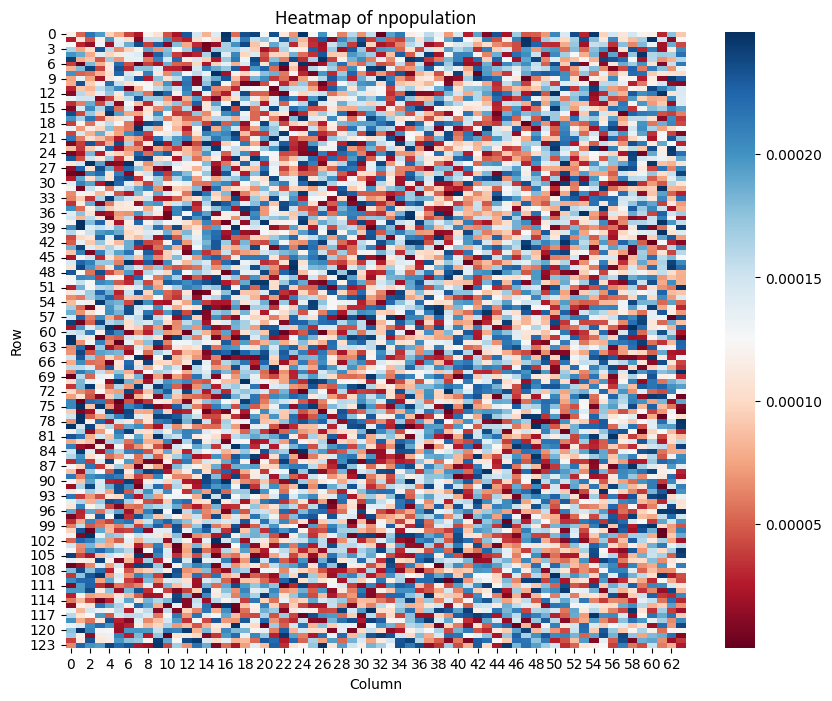

(50, 124, 64)


In [ ]:
# 만들어진 population 출력 (예시로 처음 3개 세대만 출력)
for i in range(3):
    print("Population", i+1, ":\n", population[i])
    print("Total Sum:", np.sum(population[i]))

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
npopulation=np.array(population[0], float)
# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(npopulation, cmap='RdBu', vmin=npopulation.min(), vmax=npopulation.max())
plt.title('Heatmap of npopulation')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

print(population.shape)


In [ ]:
population[1].shape

(124, 64)

In [ ]:
dividends.shape

(124, 64)

In [ ]:
a = population[6] * dividends
a.shape
print(np.sum(a))

0.21556627304556528


In [ ]:
sharpe_ratio(population[6])

0.21556627304556528

In [ ]:
data.shape

(124, 64)

In [ ]:
parent1 = random.choice(population)
parent1.shape

(124, 64)

In [ ]:
parent1[10:].shape

(114, 64)

In [ ]:
# 초기 유전 알고리즘 파라미터 설정
population_size = 50
num_generations = 1000
mutation_rate = 0.1
budget = 1 #가정

# population 배열 생성
population = np.zeros((population_size, 124, 64))

for i in range(population_size):
    # 전체 합이 예산만큼 크기를 가지도록 매트릭스 생성
    initial_sol = np.random.rand(124, 64)
    total_sum = np.sum(initial_sol)
    initial_sol = initial_sol * budget / total_sum
    population[i] = initial_sol
# 유전 알고리즘
for generation in range(num_generations):
    # 각 염색체의 샤프 지수 계산
    fitness_scores = [sharpe_ratio(weights) for weights in population]

    # 새로운 세대 생성
    new_population = []
    for _ in range(500):
        # 부모 선택 (토너먼트 선택)
        parent1 = random.choice(population)
        parent2 = random.choice(population)

        # 교차 지점 선택
        crossover_point = np.random.randint(0, parent1.shape[0])

        # 부모로부터 자식 생성
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]), axis=0)

        child = child / np.sum(child) * budget
        # 돌연변이
        '''
        if random.random() < mutation_rate:
            mutation_point =  np.random.randint(0, parent1.shape[0])
            child[mutation_point] = random.random()

            child = child / np.sum(child) * budget # 정규화
        '''

        new_population.append(child)

    population = new_population

# 최적 해 출력
best_solution_index = np.argmax(fitness_scores)
best_solution = population[best_solution_index]
best_sharpe_ratio = fitness_scores[best_solution_index]
print("Optimal Solution:", best_solution)
print("Optimal Sharpe Ratio:", best_sharpe_ratio)

Optimal Solution: [[1.22487444e-04 1.31807891e-04 1.97410639e-04 ... 8.69129160e-06
  1.60902677e-06 5.15586104e-05]
 [1.97916121e-04 5.83868511e-05 6.08980572e-05 ... 1.43266333e-05
  6.87640717e-06 2.52812511e-04]
 [5.36858189e-06 2.50711878e-04 1.43931413e-04 ... 1.85972978e-04
  1.91320236e-04 9.09972198e-05]
 ...
 [2.22368124e-04 5.91233860e-05 7.31967642e-05 ... 1.57340500e-04
  2.45182879e-04 7.95000243e-05]
 [1.02526321e-04 2.33179596e-04 2.34515870e-04 ... 1.99671327e-05
  1.26008748e-04 1.46673093e-04]
 [7.73910676e-05 1.40288538e-05 1.92108842e-04 ... 2.53732455e-04
  1.27972008e-04 1.17554419e-04]]
Optimal Sharpe Ratio: 0.2194588466559052


In [ ]:
print(child.shape)
print(np.sum(child))

(124, 64)
1.0000000000000002


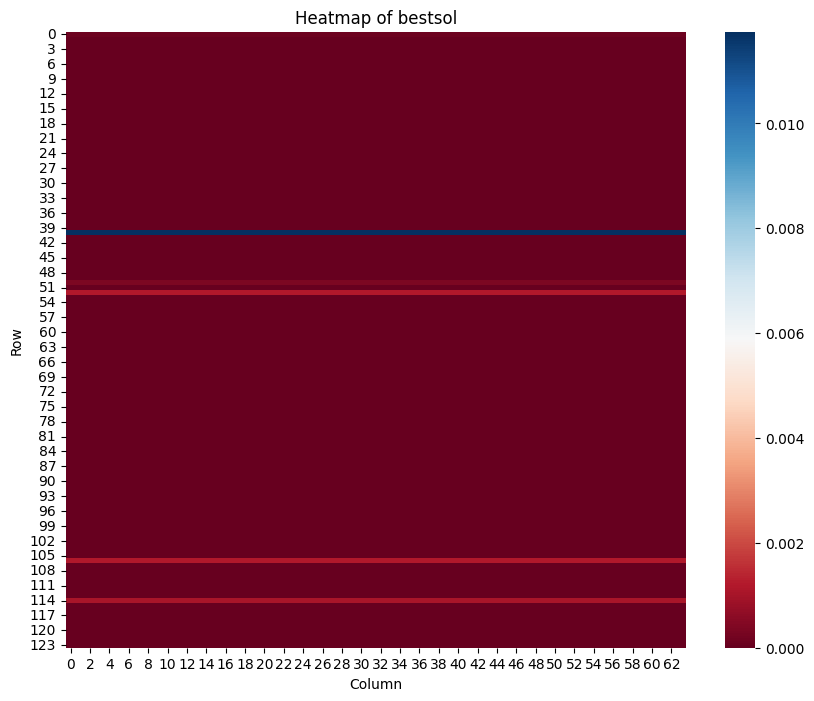

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
bestsol=np.array(best_solution, float)
# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(bestsol, cmap='RdBu', vmin=bestsol.min(), vmax=bestsol.max())
plt.title('Heatmap of bestsol')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

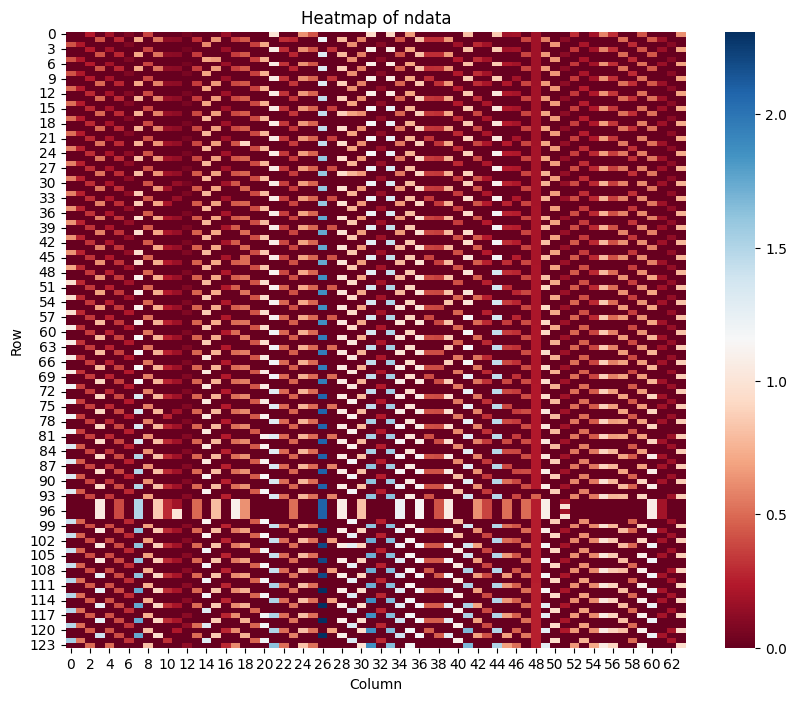

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ndata = np.array(data,float)
# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(ndata, cmap='RdBu', vmin=ndata.min(), vmax=ndata.max())
plt.title('Heatmap of ndata')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()
